<a href="https://colab.research.google.com/github/GuntherFrager/Abalone/blob/main/Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion con dataset de abalones

Trabajo hecho para la competencia [Regression with an Abalone Dataset](https://www.kaggle.com/competitions/playground-series-s4e4/data?select=sample_submission.csv) de Kaggle.

El objetivo es determinar la edad de cada individuo, la cual se ve reflejada en la columna "rings"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Abalone/train.csv', index_col='id')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


Buscamos nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


No hay nulos, no obstante identificamos que la variable "sex" es categorica no-numerica, por lo que deberemos transformarla

In [ ]:
df.Sex.value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,True,False,False
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,True,False,False
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,False,True,False
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,False,True
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,False,True,False


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Analisis univariado

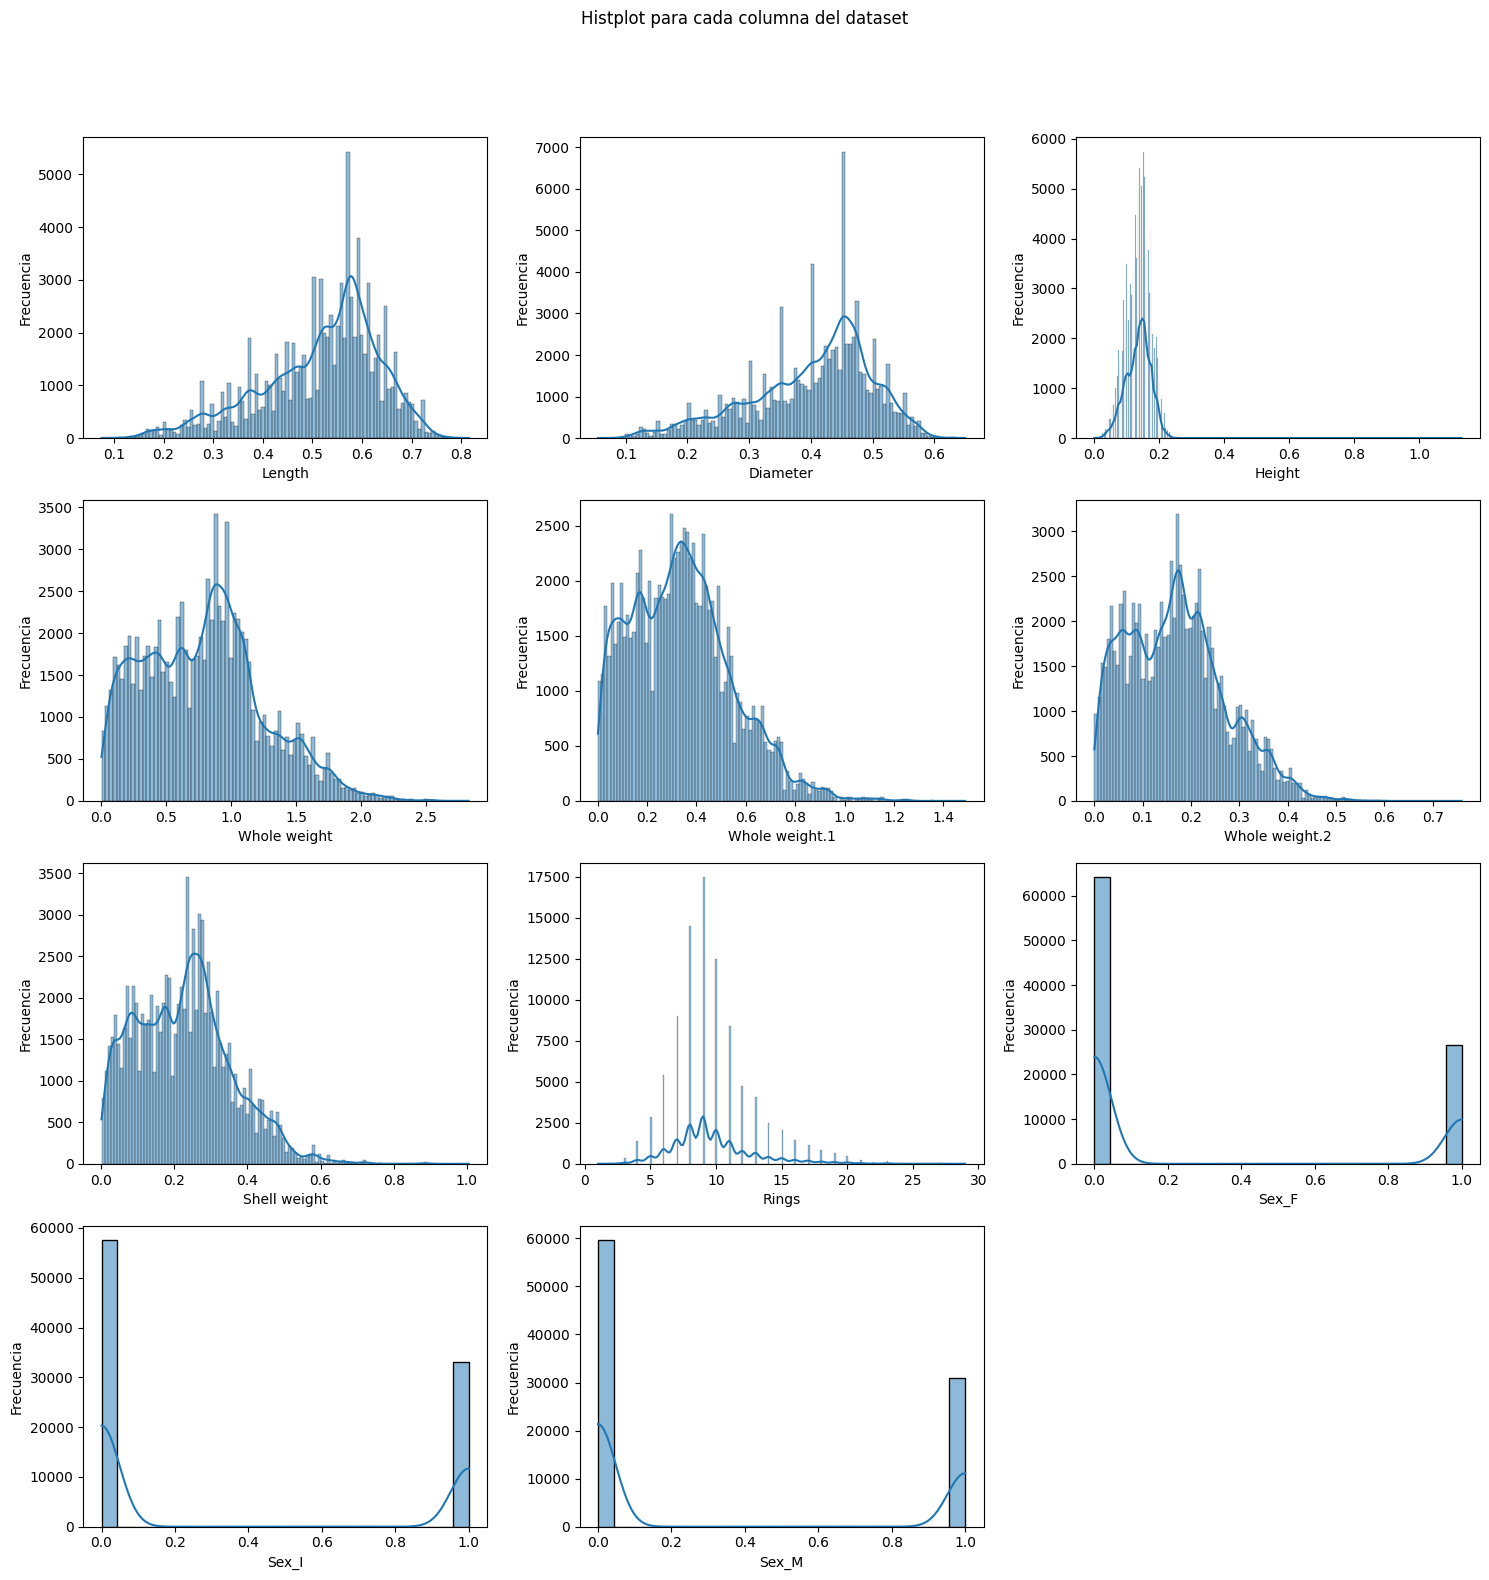

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.suptitle('Histplot para cada columna del dataset', y=1.05)
plt.tight_layout()
plt.show()

## Analisis multivariado

Mapa de correlacion

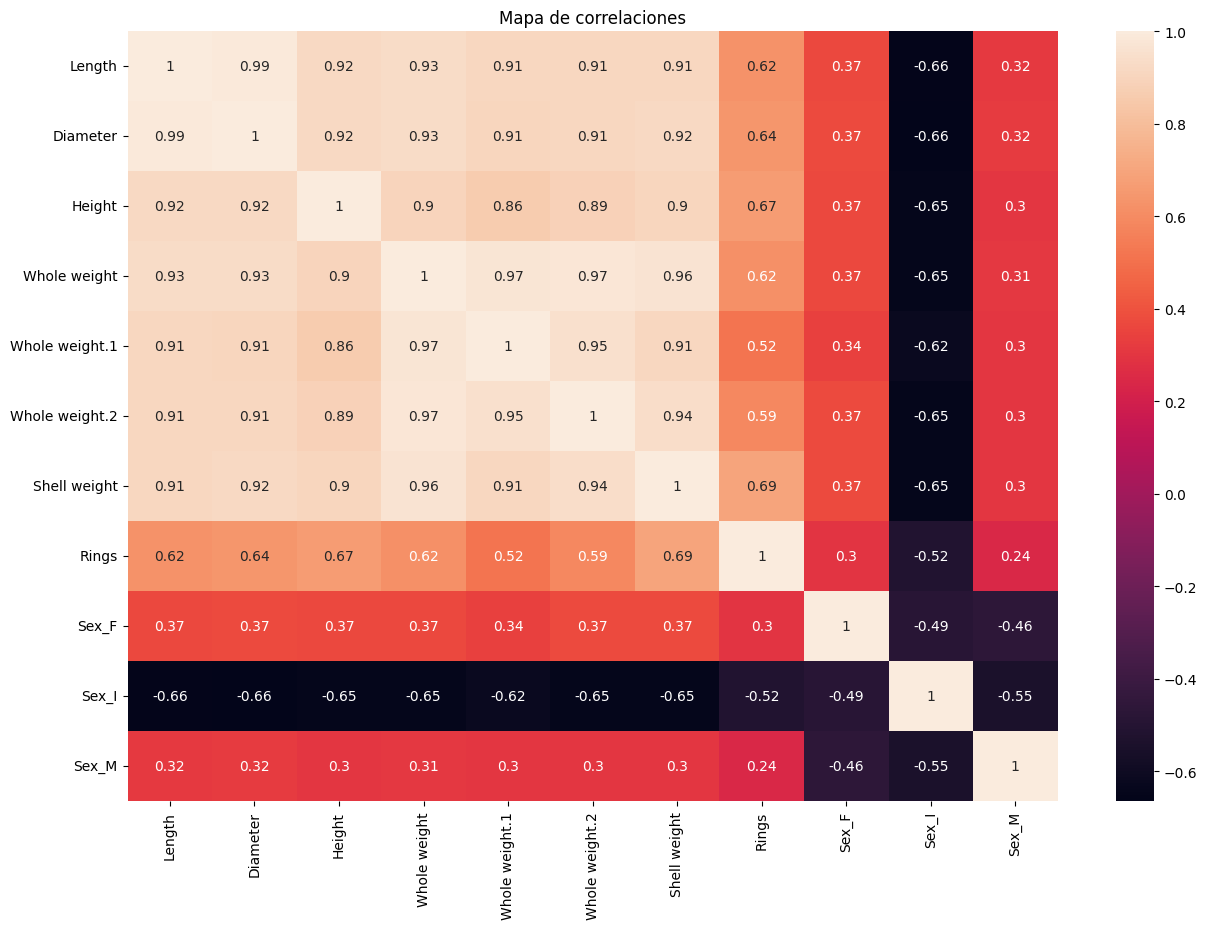

In [ ]:
plt.figure(figsize = (15,10))

sns.heatmap(df.corr(), annot=True)
plt.title('Mapa de correlaciones')

plt.show()

Pairplot

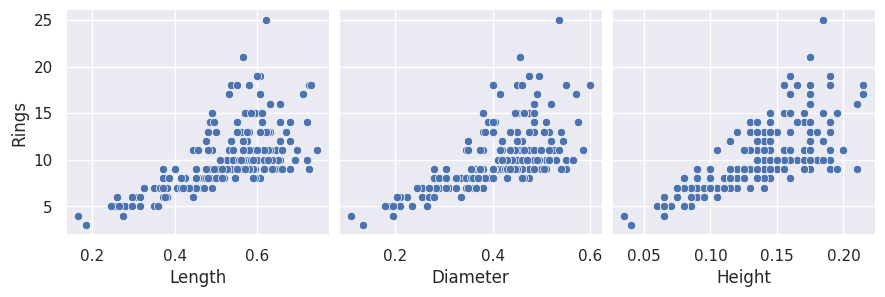

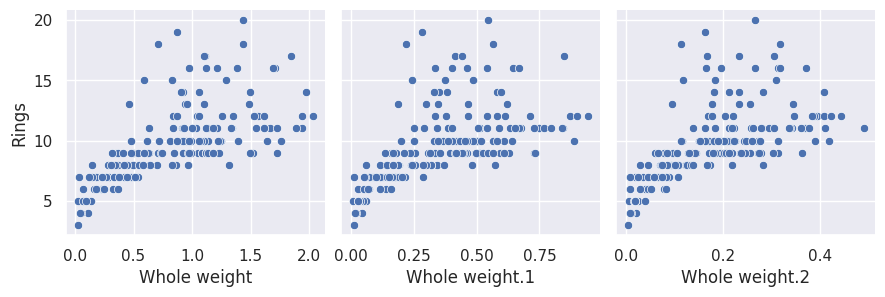

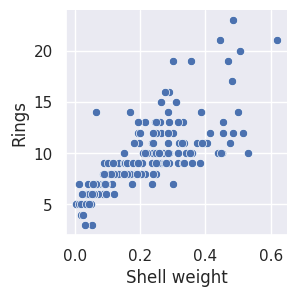

In [ ]:
#Por algun motivo, usar la funcion "drop" hace que el grafico se genere mucho mas rapido que si elijo las variables

sns.set()

sns.pairplot(df.sample(200),
             x_vars=df.drop(['Whole weight',	'Whole weight.1',	'Whole weight.2',
                             'Shell weight',
                             'Sex_F', 'Sex_I', 'Sex_M', 'Rings'],axis=1),
             y_vars=df.drop(['Length',	'Diameter',	'Height',
                             'Whole weight',	'Whole weight.1',	'Whole weight.2',
                             'Shell weight',
                             'Sex_F', 'Sex_I', 'Sex_M'],axis=1),
             height= 3)

plt.show()

sns.set()

sns.pairplot(df.sample(200),
             x_vars=df.drop(['Length',	'Diameter',	'Height',
                             'Shell weight',
                             'Sex_F', 'Sex_I', 'Sex_M', 'Rings'],axis=1),
             y_vars=df.drop(['Length',	'Diameter',	'Height',
                             'Whole weight',	'Whole weight.1',	'Whole weight.2',
                             'Shell weight',
                             'Sex_F', 'Sex_I', 'Sex_M'],axis=1),
             height= 3)

plt.show()

sns.pairplot(df.sample(200),
             x_vars=df.drop(['Length',	'Diameter',	'Height',
                             'Whole weight',	'Whole weight.1',	'Whole weight.2',
                             'Sex_F', 'Sex_I', 'Sex_M', 'Rings'],axis=1),
             y_vars=df.drop(['Length',	'Diameter',	'Height',
                             'Whole weight',	'Whole weight.1',	'Whole weight.2',
                             'Shell weight',
                             'Sex_F', 'Sex_I', 'Sex_M'],axis=1),
             height= 3)

plt.show()

Efectivamente todas las variables guardan relacion directa con la variable objetivo

# Construyendo el modelo

## Train-Test split